In [86]:
import os
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from autoencoder import CustomDataset, Autoencoder
from collections import defaultdict

In [87]:
# load model from ./results/model_1.pt
model = Autoencoder(0.2, 2304)
model.load_state_dict(torch.load('./results/model_1.pt', weights_only=True,map_location=torch.device('cpu')))
model.eval()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Linear(in_features=4608, out_features=2304, bias=True)
    (9): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2304, out_features=4608, bias=True)
    (1): ReLU()
    (2): Unflatten(dim=1, unflattened_size=(32, 12, 12))
    (3): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): ReLU()
    (5): ConvTranspose2d(16, 1, kernel_size=(5, 5), stride=(1, 1))
    (6): Sigmoid()
  )
)

In [88]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

train_set_orig = datasets.FashionMNIST('MNIST_data/', download = True, train = True,  transform = transform)
valid_set_orig = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)

train_set_autoencoder = CustomDataset(train_set_orig)
valid_set_autoencoder = CustomDataset(valid_set_orig)

In [89]:
train_set_autoencoder = CustomDataset(train_set_orig)
valid_set_autoencoder = CustomDataset(valid_set_orig)

In [90]:
train_loader = DataLoader(train_set_autoencoder, batch_size=100, shuffle=True, num_workers=os.cpu_count()-1)
valid_loader = DataLoader(valid_set_autoencoder, batch_size=100, shuffle=False, num_workers=os.cpu_count()-1)

torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])


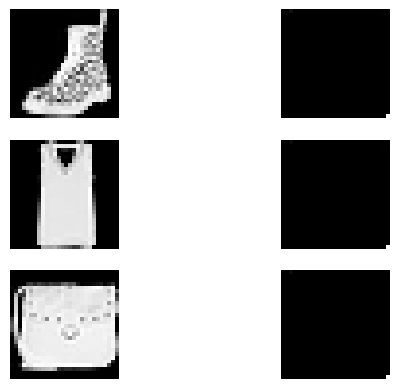

In [109]:
figure = plt.figure()
rows,cols = 3,2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print 3 images and their reconstructions
for i in range(1,rows+1):
    j = torch.randint(len(train_set_autoencoder),size=(1,)).item()
    image,_ = train_set_autoencoder[j]
    image = image.unsqueeze(0).to(device)
    with torch.no_grad():
        model.eval()
        output = model(image)
        print(output.shape)
        
    figure.add_subplot(rows,cols,2*i-1)
    plt.axis("off")
    plt.imshow(image.squeeze().cpu(),cmap="Greys_r")
    figure.add_subplot(rows,cols,2*i)
    plt.axis("off")
    plt.imshow(output.squeeze().cpu(),cmap="Greys_r")